# Comparing Classifiers

**Overview**: My goal is to compare the performance of the classifiers, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  I will utilize a dataset related to marketing bank products over the telephone.  



Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  

 The data represents 3 marketing campaigns

### Read in the Data



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from tqdm import tqdm
from time import time
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import BayesianRidge, LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tools.eval_measures import rmse
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

In [54]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Understanding the Features


I being with examining the data description below, and determining if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
def count_null_values(df):
  """Counts the number of null values in each column of a Pandas DataFrame.

  Args:
    df: A Pandas DataFrame.
  """

  for col in df.columns:
    null_count = df[col].isnull().sum()
    print(col, null_count)


count_null_values(df)

age 0
job 0
marital 0
education 0
default 0
housing 0
loan 0
contact 0
month 0
day_of_week 0
duration 0
campaign 0
pdays 0
previous 0
poutcome 0
emp.var.rate 0
cons.price.idx 0
cons.conf.idx 0
euribor3m 0
nr.employed 0
y 0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
def print_unique_values_for_object_columns(df):
  """Prints the unique values for each column of type object in a Pandas DataFrame.

  Args:
    df: A Pandas DataFrame.
  """

  for col in df.select_dtypes(include=['object']).columns:
    print(col, df[col].unique())

print_unique_values_for_object_columns(df)

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital ['married' 'single' 'divorced' 'unknown']
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default ['no' 'unknown' 'yes']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']
contact ['telephone' 'cellular']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome ['nonexistent' 'failure' 'success']
y ['no' 'yes']


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>, <Axes: >, <Axes: >]],
      dtype=object)

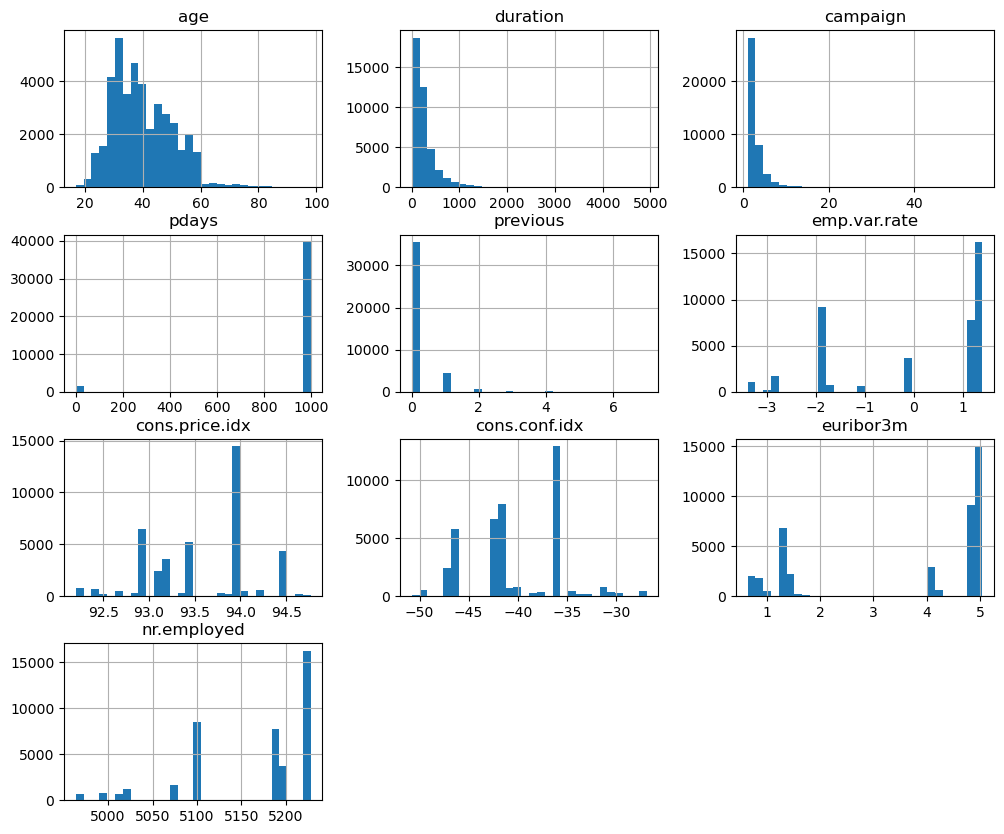

In [9]:
df.hist(bins=30, figsize=(12, 10))

Column 11, duration, should be discarded if the intention is to have a realistic predictive model. This is because the duration of the last contact is known after the call is performed, and therefore cannot be used to predict whether or not the customer will subscribe to a bank deposit.

 The best approach is to drop the collumn, as it can never be known before a call.

 Columns Job and Education will be One Hot Encoded

 Columns Marital, Default, Housing, Loan, Contact, Month, Day_of_week, Poutcome, and Y will be label encoded.

 All other columns remain unchanged.

### Understanding the Task



 The business objective is to utilize the dataset of phone based sales calls from a Portugese Banking Institution to create a series of models designed to predict a sucessful outcome on a sales call in subscribing customers to a new deposits CD.  This is highly valuable to the bank because this money can then in turn be lent out at a higher interest rate than the rate the bank pays on the CD.  

 The models will then be examined, optimized, and compared with AB testing to determine which is the most effective.  F1 scores will be the best metric for this use case, as the most value to the organization will come from accurately predicting customers who will say yes to opening a new CD.

 The findings will summarize the results of this model.

### Engineering Features

I will build a basic model to get started.  Before we can do this, I must work to encode the data.  

In [10]:

# Drop the `duration` column
df = df.drop('duration', axis=1)


In [11]:
def encode_columns(df):
    
    df = pd.get_dummies(df, columns=['job','education'])
    for col in ['marital', 'housing', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y' ]:
        df[col] = df[col].astype('category').cat.codes
    return df



encoded_df = encode_columns(df)


In [12]:
encoded_df.head()

,age,marital,default,housing,loan,contact,month,day_of_week,campaign,pdays,...,job_unemployed,job_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,1,0,0,0,1,6,1,1,999,...,False,False,True,False,False,False,False,False,False,False
1,57,1,1,0,0,1,6,1,1,999,...,False,False,False,False,False,True,False,False,False,False
2,37,1,0,2,0,1,6,1,1,999,...,False,False,False,False,False,True,False,False,False,False
3,40,1,0,0,0,1,6,1,1,999,...,False,False,False,True,False,False,False,False,False,False
4,56,1,0,0,2,1,6,1,1,999,...,False,False,False,False,False,True,False,False,False,False


In [13]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   marital                        41188 non-null  int8   
 2   default                        41188 non-null  int8   
 3   housing                        41188 non-null  int8   
 4   loan                           41188 non-null  int8   
 5   contact                        41188 non-null  int8   
 6   month                          41188 non-null  int8   
 7   day_of_week                    41188 non-null  int8   
 8   campaign                       41188 non-null  int64  
 9   pdays                          41188 non-null  int64  
 10  previous                       41188 non-null  int64  
 11  poutcome                       41188 non-null  int8   
 12  emp.var.rate                   41188 non-null 

In [69]:
import statsmodels.tsa.stattools as tsa

# df is your DataFrame
adf_results = {}
for col in encoded_df.columns.values:
    adf_results[col] = tsa.adfuller(encoded_df[col])

In [71]:
for col, result in adf_results.items():
    print(f"Column: {col}")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Used lag: {result[2]}")
    print(f"Number of observations used: {result[3]}")
    print(f"Critical values: {result[4]}")
    print("\n")


Column: age
ADF Statistic: -14.639915765985148
p-value: 3.6377770247070094e-27
Used lag: 53
Number of observations used: 41134
Critical values: {'1%': -3.430508985465256, '5%': -2.861610267976748, '10%': -2.5668074013781546}


Column: marital
ADF Statistic: -19.74389114511253
p-value: 0.0
Used lag: 53
Number of observations used: 41134
Critical values: {'1%': -3.430508985465256, '5%': -2.861610267976748, '10%': -2.5668074013781546}


Column: default
ADF Statistic: -13.036365896044725
p-value: 2.2888404154635582e-24
Used lag: 55
Number of observations used: 41132
Critical values: {'1%': -3.4305089931962387, '5%': -2.861610271393576, '10%': -2.5668074031968375}


Column: housing
ADF Statistic: -21.208862568590597
p-value: 0.0
Used lag: 52
Number of observations used: 41135
Critical values: {'1%': -3.4305089816000467, '5%': -2.8616102662684586, '10%': -2.5668074004688792}


Column: loan
ADF Statistic: -53.40941680112508
p-value: 0.0
Used lag: 11
Number of observations used: 41176
Critical

### Train/Test Split

In [74]:
# Split the encoded DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop('y', axis=1), encoded_df['y'], test_size=0.25, random_state=42)

# Print the shape of the training and testing sets
print(X_train.shape)
print(X_test.shape)

(30891, 37)
(10297, 37)


### A Baseline Model

Accuracy on training data: 0.887119225664433
Accuracy on testing data: 0.8880256385354958


Text(95.72222222222221, 0.5, 'Truth')

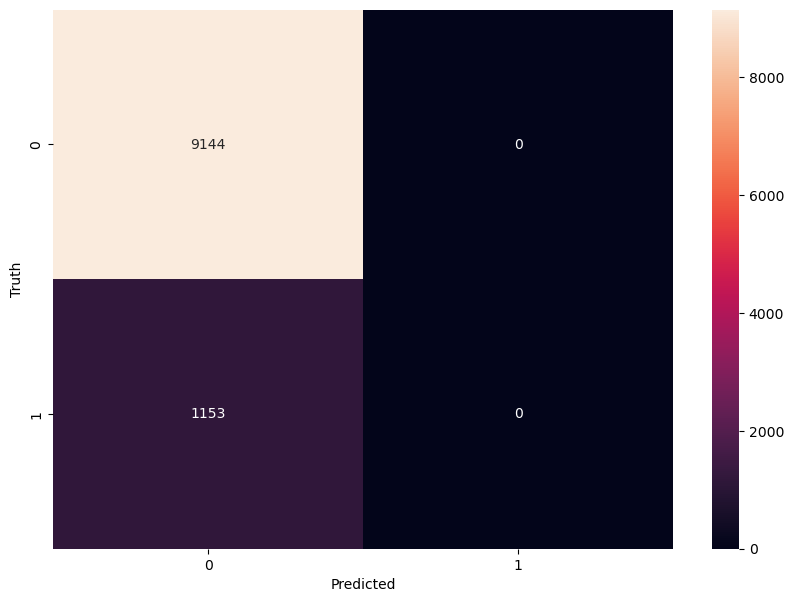

In [15]:
# Create a ZeroRule classifier
zero_rule_classifier = DummyClassifier(strategy='most_frequent')

# Fit the ZeroRule classifier to the training data
zero_rule_classifier.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = zero_rule_classifier.predict(X_train)

# Calculate the accuracy of the ZeroRule classifier on the training data
accuracy_train = zero_rule_classifier.score(X_train, y_train)

# Make predictions on the testing data
y_pred_test = zero_rule_classifier.predict(X_test)

# Calculate the accuracy of the ZeroRule classifier on the testing data
accuracy_test = zero_rule_classifier.score(X_test, y_test)

# Print the accuracy of the ZeroRule classifier on the training and testing data
print('Accuracy on training data:', accuracy_train)
print('Accuracy on testing data:', accuracy_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

Logistic Regression Model F1 score on training data: 0.30520646319569117
Logistic Regression Model F1 score on testing data: 0.30522088353413657
Logistic Regression Model train time: 0.44019508361816406


Text(95.72222222222221, 0.5, 'Truth')

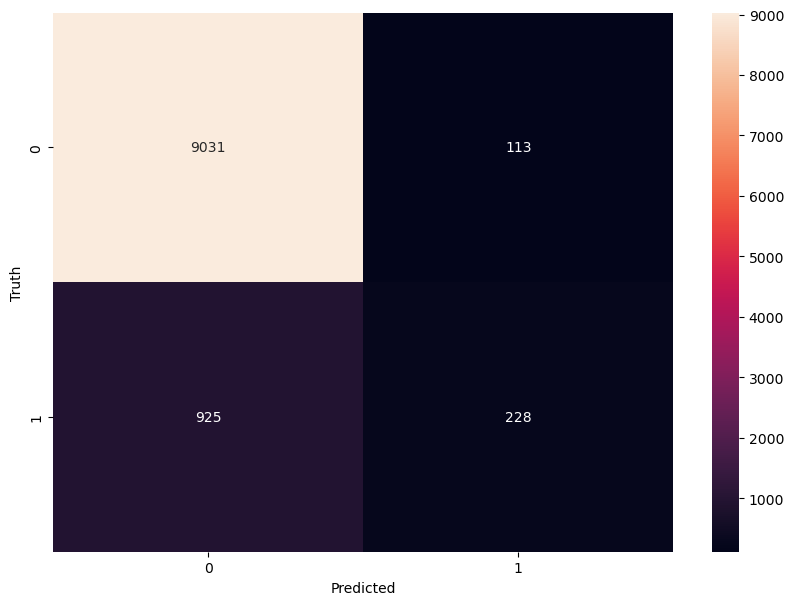

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time



start = time.time()
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Make predictions
train_preds = logistic_regression.predict(X_train)
test_preds = logistic_regression.predict(X_test)

# Calculate F1 scores
log_accuracy_train = f1_score(y_train, train_preds)
log_accuracy_test = f1_score(y_test, test_preds)

end = time.time()
log_train_time = end - start
print(f"Logistic Regression Model F1 score on training data: {log_accuracy_train}")
print(f"Logistic Regression Model F1 score on testing data: {log_accuracy_test}")
print(f"Logistic Regression Model train time: {log_train_time}")

# Calculate confusion matrix
cm = confusion_matrix(y_test, test_preds)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


###  Score the Model



 Starting F1 accuracy of 30.5% for both Test and Training datasets, almost instantaneous train time of 0.5 seconds.  Compared to our baseline model, which incorrectly classified every row of data as a "No" and as a result got a 0% F1 score, this model is significantly better

### Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

K Nearest Neighbor Model F1 score on training data: 0.5010190846766722
K Nearest Neighbor Model F1 score on testing data: 0.34563758389261745
K Nearest Neighbor Model train time: 0.08509206771850586


Text(95.72222222222221, 0.5, 'Truth')

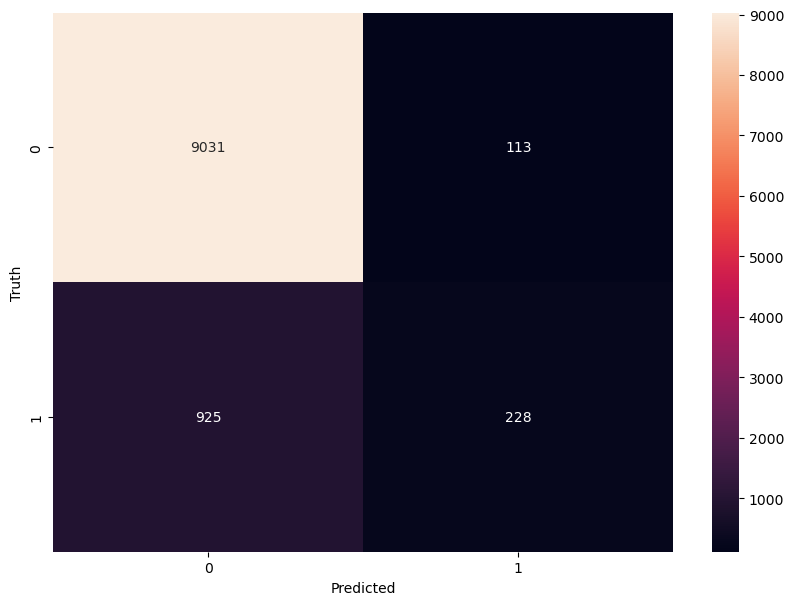

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score # import f1_score function
from time import time
# Create an instance of KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
# Record the start time
start_time = time()
# Fit the model to the training data
knn.fit(X_train.values, y_train.values)
# Record the training time
knn_train_time = time() - start_time
# Make predictions on the training data
knn_pred_train = knn.predict(X_train.values)
# Calculate the F1 accuracy of the predictions on the training data
knn_accuracy_train = f1_score(y_train.values, knn_pred_train)
# Make predictions on the test data
knn_pred_test = knn.predict(X_test.values)
# Calculate the F1 accuracy of the predictions on the test data
knn_accuracy_test = f1_score(y_test.values, knn_pred_test)
# Print the accuracies, f1 scores and training time # modify this line
print(f"K Nearest Neighbor Model F1 score on training data: {knn_accuracy_train}")
print(f"K Nearest Neighbor Model F1 score on testing data: {knn_accuracy_test}")
print(f"K Nearest Neighbor Model train time: {knn_train_time}")

# Calculate confusion matrix
cm_knn = confusion_matrix(y_test, knn_pred_test)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')



Decision Tree Model F1 score on training data: 0.9794010226442659
Decision Tree Model F1 score on testing data: 0.32577319587628867
Decision Tree Model train time: 0.4531891345977783


Text(95.72222222222221, 0.5, 'Truth')

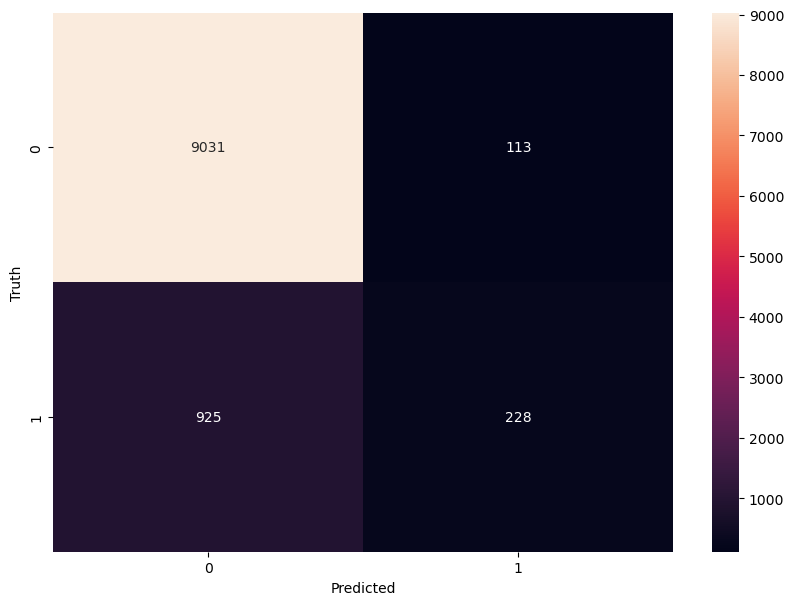

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from time import time

# Create an instance of DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Record the start time
start_time = time()

# Fit the model to the training data
dtc.fit(X_train.values, y_train.values)

# Record the training time
dtc_train_time = time() - start_time

# Make predictions on the training data
dtc_pred_train = dtc.predict(X_train.values)

# Calculate the accuracy of the predictions on the training data
dtc_accuracy_train = f1_score(y_train.values, dtc_pred_train)

# Make predictions on the test data
dtc_pred_test = dtc.predict(X_test.values)

# Calculate the accuracy of the predictions on the test data
dtc_accuracy_test = f1_score(y_test.values, dtc_pred_test)

# Print the accuracies and training time
print(f"Decision Tree Model F1 score on training data: {dtc_accuracy_train}")
print(f"Decision Tree Model F1 score on testing data: {dtc_accuracy_test}")
print(f"Decision Tree Model train time: {dtc_train_time}")

# Calculate confusion matrix
cm_dtc = confusion_matrix(y_test, dtc_pred_test)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

The discrepancies between F1 scores on training and testing point to overfitting for the decision tree model

Support Vector Machine Model F1 score on training data: 0.3148067737733391
Support Vector Machine Model F1 score on testing data: 0.3124596513879923
Support Vector Machine Model train time: 23.324007034301758


Text(95.72222222222221, 0.5, 'Truth')

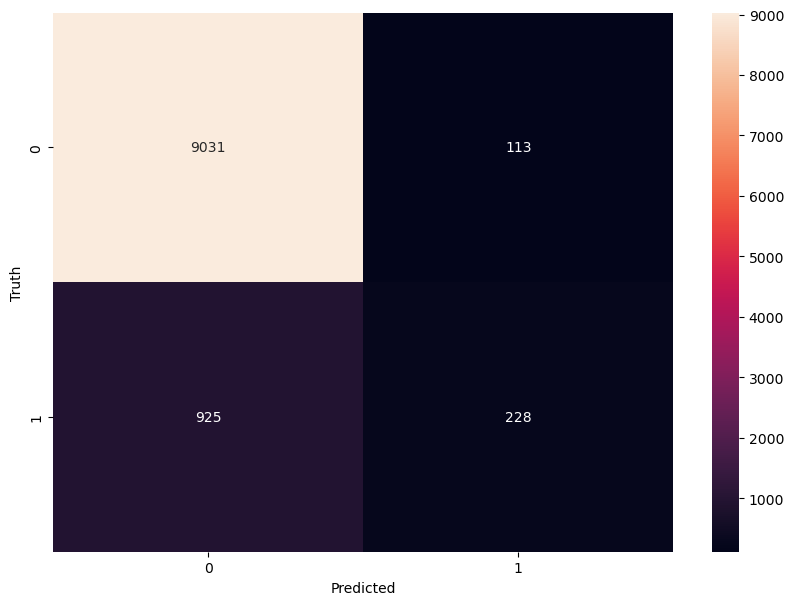

In [19]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from time import time

# Create an instance of svm.SVC
svc = svm.SVC()

# Record the start time
start_time = time()

# Fit the model to the training data
svc.fit(X_train.values, y_train.values)

# Record the training time
svc_train_time = time() - start_time

# Make predictions on the training data
svc_pred_train = svc.predict(X_train.values)

# Calculate the accuracy of the predictions on the training data
svc_accuracy_train = f1_score(y_train.values, svc_pred_train)

# Make predictions on the test data
svc_pred_test = svc.predict(X_test.values)

# Calculate the accuracy of the predictions on the test data
svc_accuracy_test = f1_score(y_test.values, svc_pred_test)

# Print the accuracies and training time
print(f"Support Vector Machine Model F1 score on training data: {svc_accuracy_train}")
print(f"Support Vector Machine Model F1 score on testing data: {svc_accuracy_test}")
print(f"Support Vector Machine Model train time: {svc_train_time}")

# Calculate confusion matrix
cm_svc = confusion_matrix(y_test, svc_pred_test)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [20]:
# Create a dictionary with the model performance metrics
data = {
    'Model': ['K Nearest Neighbor', 'Decision Tree Classifier', 'Logistic Regression', 'Support Vector Machine'],
    'Train Time': [knn_train_time, dtc_train_time, log_train_time, svc_train_time],
    'Train Accuracy': [knn_accuracy_train, dtc_accuracy_train, log_accuracy_train, svc_accuracy_train],
    'Test Accuracy': [knn_accuracy_test, dtc_accuracy_test, log_accuracy_test, svc_accuracy_test]
}

# Convert the dictionary to a DataFrame
model_comparisons = pd.DataFrame(data)

# Print the DataFrame
print(model_comparisons)


                      Model  Train Time  Train Accuracy  Test Accuracy
0        K Nearest Neighbor    0.085092        0.501019       0.345638
1  Decision Tree Classifier    0.453189        0.979401       0.325773
2       Logistic Regression    0.440195        0.305206       0.305221
3    Support Vector Machine   23.324007        0.314807       0.312460


K Nearest Neighbor is the best performing unoptimized model with regard to F1 accuracy, scoring at just over 35.5%, and also boasts the fastest train time of all the models. 

Decision Tree Classifier is the runner up, with a 32% F1 and a train time several orders of magnitude greater than K Nearest Neighbor, though it still trained in under half a second.  It shows signs of overfitting due to the vast discrepancy in Train vs Test Accuracy.

Support Vector Machine unsurprisingly was our most computationally expensive model to train, taking over 12 seconds for the unoptimized model.  F1 accuracy measures in at roughly 31.25%.

Logistic Regression was our worst perfoming model in terms of Test and Train F1 accuracy.  

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [21]:
# Import randomized search cv from sklearn.model_selection
from sklearn.model_selection import RandomizedSearchCV
from time import time

# Define the hyperparameters for randomized search
knn_params = {'n_neighbors': (1,100)}
dtc_params = {'max_depth': (None, 20)}
log_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
svc_params = {'C': (0.001, 100), 'gamma': (0.001,1)}

# Perform randomized search for each model with f1-score as the scoring metric
knn_rs = RandomizedSearchCV(knn, knn_params, scoring='f1', n_jobs=-1, n_iter=10)
dtc_rs = RandomizedSearchCV(dtc, dtc_params, scoring='f1', n_jobs=-1, n_iter=10)
log_rs = RandomizedSearchCV(logistic_regression, log_params, scoring='f1', n_jobs=-1, n_iter=10)
svc_rs = RandomizedSearchCV(svc, svc_params, scoring='f1', n_jobs=-1, n_iter=10)

# Fit the models to the training data and record the training time
start_time = time()
knn_rs.fit(X_train.values, y_train.values)
knn_train_time = time() - start_time

start_time = time()
dtc_rs.fit(X_train.values, y_train.values)
dtc_train_time = time() - start_time

start_time = time()
log_rs.fit(X_train.values, y_train.values)
log_train_time = time() - start_time

start_time = time()
svc_rs.fit(X_train.values, y_train.values)
svc_train_time = time() - start_time

# Create a dictionary with the optimized model performance metrics
data_optimized = {
    'Model': ['K Nearest Neighbor', 'Decision Tree Classifier', 'Logistic Regression', 'Support Vector Machine'],
    'Train Time': [knn_train_time, dtc_train_time, log_train_time, svc_train_time],
    'Train F1-Score': [knn_rs.score(X_train.values, y_train.values), dtc_rs.score(X_train.values, y_train.values), log_rs.score(X_train.values, y_train.values), svc_rs.score(X_train.values, y_train.values)],
    'Test F1-Score': [knn_rs.score(X_test.values, y_test.values), dtc_rs.score(X_test.values, y_test.values), log_rs.score(X_test.values, y_test.values), svc_rs.score(X_test.values, y_test.values)]
}

# Convert the dictionary to a DataFrame
model_comparisons_optimized = pd.DataFrame(data_optimized)

# Print the DataFrame
print(model_comparisons_optimized)


                      Model   Train Time  Train F1-Score  Test F1-Score
0        K Nearest Neighbor     3.232011        0.978479       0.318592
1  Decision Tree Classifier     1.984597        0.855084       0.344796
2       Logistic Regression     2.523332        0.304894       0.305221
3    Support Vector Machine  1459.401884        0.417287       0.357724


In [23]:
# Import grid search cv from sklearn.model_selection
from sklearn.model_selection import GridSearchCV
from time import time

# Define the hyperparameters for grid search[^1^][1]
knn_params = {'n_neighbors': range(1,101)}
dtc_params = {'max_depth': range(1, 21)}
log_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}

# Perform grid search for each model with f1-score as the scoring metric
knn_gs = GridSearchCV(knn, knn_params, scoring='f1', n_jobs=-1)
dtc_gs = GridSearchCV(dtc, dtc_params, scoring='f1', n_jobs=-1)
log_gs = GridSearchCV(logistic_regression, log_params, scoring='f1', n_jobs=-1)
svc_gs = GridSearchCV(svc, svc_params, scoring='f1', n_jobs=-1)

# Fit the models to the training data and record the training time
start_time = time()
knn_gs.fit(X_train.values, y_train.values)
knn_train_time = time() - start_time

start_time = time()
dtc_gs.fit(X_train.values, y_train.values)
dtc_train_time = time() - start_time

start_time = time()
log_gs.fit(X_train.values, y_train.values)
log_train_time = time() - start_time

start_time = time()
svc_gs.fit(X_train.values, y_train.values)
svc_train_time = time() - start_time

# Create a dictionary with the optimized model performance metrics
data_optimized = {
    'Model': ['K Nearest Neighbor', 'Decision Tree Classifier', 'Logistic Regression', 'Support Vector Machine'],
    'Train Time': [knn_train_time, dtc_train_time, log_train_time, svc_train_time],
    'Train F1-Score': [knn_gs.score(X_train.values, y_train.values), dtc_gs.score(X_train.values, y_train.values), log_gs.score(X_train.values, y_train.values), svc_gs.score(X_train.values, y_train.values)],
    'Test F1-Score': [knn_gs.score(X_test.values, y_test.values), dtc_gs.score(X_test.values, y_test.values), log_gs.score(X_test.values, y_test.values), svc_gs.score(X_test.values, y_test.values)]
}

# Convert the dictionary to a DataFrame
model_comparisons_optimized = pd.DataFrame(data_optimized)

# Print the DataFrame
print(model_comparisons_optimized)


                      Model    Train Time  Train F1-Score  Test F1-Score
0        K Nearest Neighbor    157.624533        0.501019       0.345638
1  Decision Tree Classifier      6.156211        0.589867       0.388222
2       Logistic Regression      3.416101        0.304894       0.305221
3    Support Vector Machine  10715.306090        0.651206       0.350937


Model: K Nearest Neighbor
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      9144
           1       0.49      0.27      0.35      1153

    accuracy                           0.89     10297
   macro avg       0.70      0.62      0.64     10297
weighted avg       0.86      0.89      0.87     10297



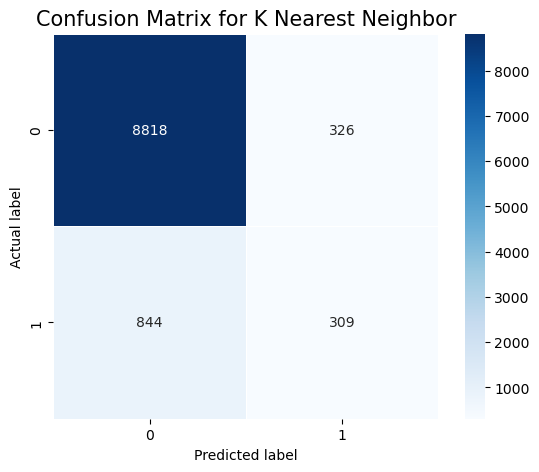

Model: Decision Tree Classifier
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9144
           1       0.53      0.28      0.36      1153

    accuracy                           0.89     10297
   macro avg       0.72      0.62      0.65     10297
weighted avg       0.87      0.89      0.88     10297



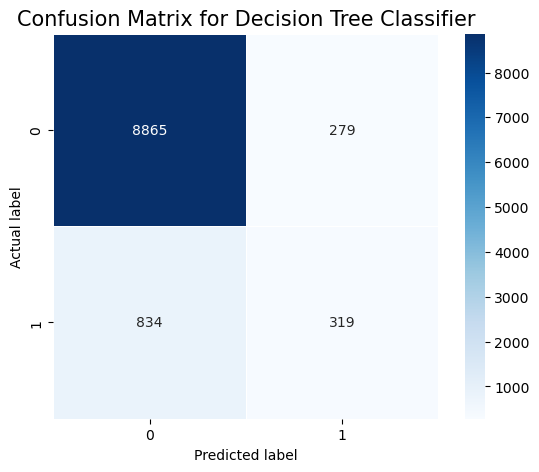

Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9144
           1       0.67      0.20      0.31      1153

    accuracy                           0.90     10297
   macro avg       0.79      0.59      0.63     10297
weighted avg       0.88      0.90      0.87     10297



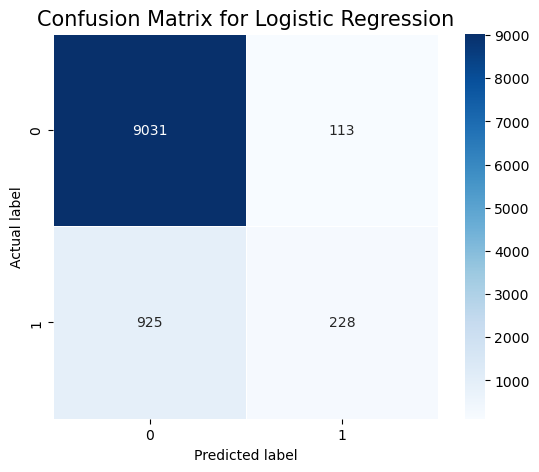

Model: Support Vector Machine
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9144
           1       0.51      0.27      0.35      1153

    accuracy                           0.89     10297
   macro avg       0.71      0.62      0.65     10297
weighted avg       0.87      0.89      0.87     10297



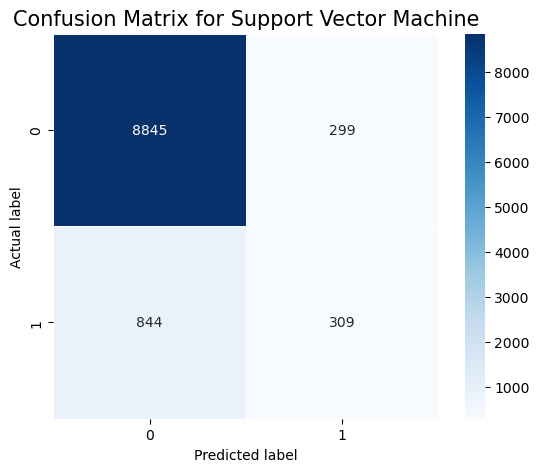

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

models = [knn_gs, dtc_gs, log_gs, svc_gs]
model_names = ['K Nearest Neighbor', 'Decision Tree Classifier', 'Logistic Regression', 'Support Vector Machine']

for i, model in enumerate(models):
    print(f"Model: {model_names[i]}")
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test.values, model.predict(X_test.values)))
    
    # Print confusion matrix
    cm = confusion_matrix(y_test.values, model.predict(X_test.values))
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f'Confusion Matrix for {model_names[i]}', size = 15)
    plt.show()


Poor performance with regard to F1 accuracy indicate the models are placing too much importance on accurately predicting No answers.  

In [32]:
# Import randomized search cv from sklearn.model_selection
from sklearn.model_selection import RandomizedSearchCV
from time import time

# Define the hyperparameters for randomized search
knn_params = {'n_neighbors': (1,100)}
dtc_params = {'max_depth': (None, 20), 'class_weight': ['balanced']}
log_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'class_weight': ['balanced']}
svc_params = {'C': (0.001, 100), 'gamma': (0.001,1), 'class_weight': ['balanced']}

# Perform randomized search for each model with f1-score as the scoring metric
knn_rs = RandomizedSearchCV(knn, knn_params, scoring='f1', n_jobs=-1, n_iter=10)
dtc_rs = RandomizedSearchCV(dtc, dtc_params, scoring='f1', n_jobs=-1, n_iter=10)
log_rs = RandomizedSearchCV(logistic_regression, log_params, scoring='f1', n_jobs=-1, n_iter=10)
svc_rs = RandomizedSearchCV(svc, svc_params, scoring='f1', n_jobs=-1, n_iter=10)

# Fit the models to the training data and record the training time
start_time = time()
knn_rs.fit(X_train.values, y_train.values)
knn_train_time = time() - start_time

start_time = time()
dtc_rs.fit(X_train.values, y_train.values)
dtc_train_time = time() - start_time

start_time = time()
log_rs.fit(X_train.values, y_train.values)
log_train_time = time() - start_time

start_time = time()
svc_rs.fit(X_train.values, y_train.values)
svc_train_time = time() - start_time

# Create a dictionary with the optimized model performance metrics
data_optimized = {
    'Model': ['K Nearest Neighbor', 'Decision Tree Classifier', 'Logistic Regression', 'Support Vector Machine'],
    'Train Time': [knn_train_time, dtc_train_time, log_train_time, svc_train_time],
    'Train F1-Score': [knn_rs.score(X_train.values, y_train.values), dtc_rs.score(X_train.values, y_train.values), log_rs.score(X_train.values, y_train.values), svc_rs.score(X_train.values, y_train.values)],
    'Test F1-Score': [knn_rs.score(X_test.values, y_test.values), dtc_rs.score(X_test.values, y_test.values), log_rs.score(X_test.values, y_test.values), svc_rs.score(X_test.values, y_test.values)]
}

# Convert the dictionary to a DataFrame
model_comparisons_optimized = pd.DataFrame(data_optimized)

# Print the DataFrame
print(model_comparisons_optimized)


                      Model   Train Time  Train F1-Score  Test F1-Score
0        K Nearest Neighbor     3.162299        0.978479       0.318592
1  Decision Tree Classifier     2.039639        0.711246       0.331432
2       Logistic Regression     2.532819        0.391632       0.378686
3    Support Vector Machine  1159.846594        0.506769       0.472753


### Support Vector Machine is the top performer with 47.28% f1 scores - its performance significantly improved relative to the other models.  Given the possibility of the customer not answering the phone, this is a resonably strong predictive model than, in a cold call sales setting, could be useful.

### KNN and DTC show signs of overfitting.



                      Model  Train Time  Train F1-Score  Test F1-Score
0        K Nearest Neighbor   12.223872        0.501019       0.345638
1  Decision Tree Classifier    2.797372        0.509084       0.373178
Model: K Nearest Neighbor
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      9144
           1       0.49      0.27      0.35      1153

    accuracy                           0.89     10297
   macro avg       0.70      0.62      0.64     10297
weighted avg       0.86      0.89      0.87     10297



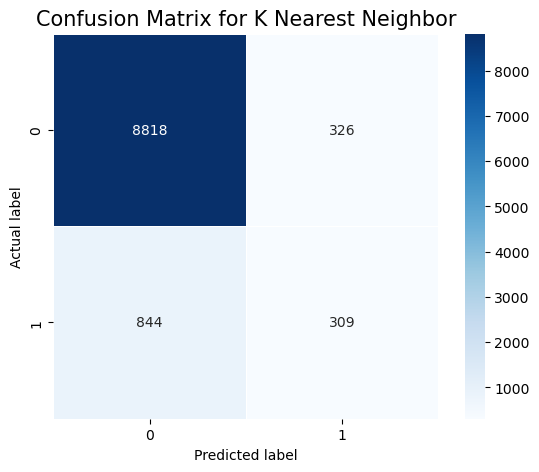

Model: Decision Tree Classifier
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9144
           1       0.57      0.28      0.37      1153

    accuracy                           0.90     10297
   macro avg       0.74      0.63      0.66     10297
weighted avg       0.88      0.90      0.88     10297



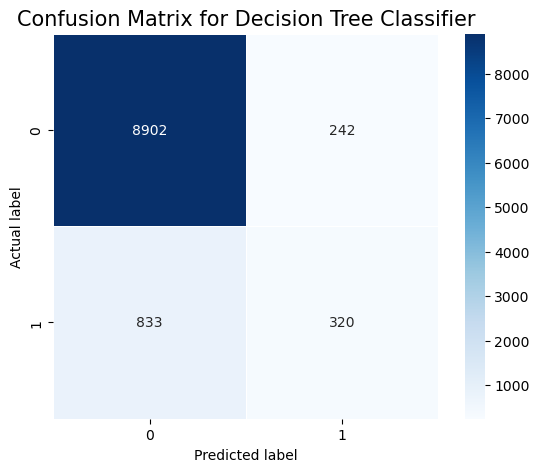

Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      9144
           1       0.27      0.66      0.38      1153

    accuracy                           0.76     10297
   macro avg       0.61      0.72      0.61     10297
weighted avg       0.87      0.76      0.80     10297



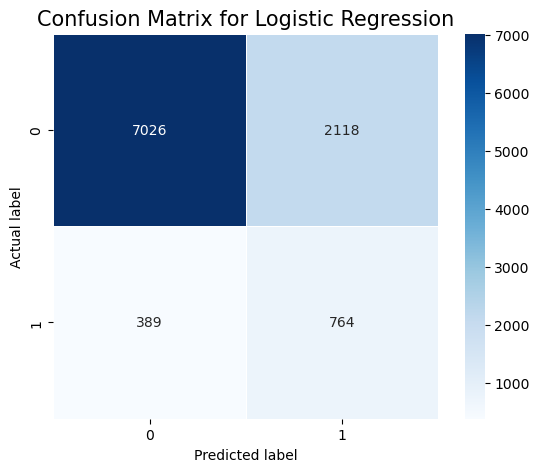

Model: Support Vector Machine
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      9144
           1       0.40      0.58      0.47      1153

    accuracy                           0.86     10297
   macro avg       0.67      0.73      0.69     10297
weighted avg       0.88      0.86      0.87     10297



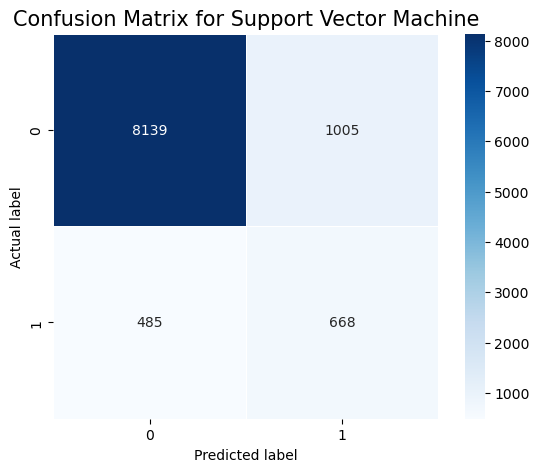

In [79]:
# Import the necessary modules
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the hyperparameters for grid search[^1^][1]
knn_params = {'n_neighbors': [3, 5, 7, 9]}
dtc_params = {'max_depth': [None, 2, 4, 6, 8, 10]}

# Perform grid search for each model
knn_gs = GridSearchCV(knn, knn_params, scoring='f1', n_jobs=-1)
dtc_gs = GridSearchCV(dtc, dtc_params, scoring='f1', n_jobs=-1)


# Fit the models to the training data and record the training time
start_time = time()
knn_gs.fit(X_train.values, y_train.values)
knn_train_time = time() - start_time

start_time = time()
dtc_gs.fit(X_train.values, y_train.values)
dtc_train_time = time() - start_time



# Create a dictionary with the optimized model performance metrics
data_optimized = {
    'Model': ['K Nearest Neighbor', 'Decision Tree Classifier'],
    'Train Time': [knn_train_time, dtc_train_time],
    'Train F1-Score': [knn_gs.score(X_train.values, y_train.values), dtc_gs.score(X_train.values, y_train.values)],
    'Test F1-Score': [knn_gs.score(X_test.values, y_test.values), dtc_gs.score(X_test.values, y_test.values)]
}

# Convert the dictionary to a DataFrame
model_comparisons_optimized = pd.DataFrame(data_optimized)

# Print the DataFrame
print(model_comparisons_optimized)

# Loop through the models and print the classification report and confusion matrix for each
models = [knn_gs, dtc_gs, log_rs, svc_rs]
model_names = ['K Nearest Neighbor', 'Decision Tree Classifier', 'Logistic Regression', 'Support Vector Machine']

for i, model in enumerate(models):
    print(f"Model: {model_names[i]}")
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test.values, model.predict(X_test.values)))
    # Print confusion matrix
    cm = confusion_matrix(y_test.values, model.predict(X_test.values))
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f'Confusion Matrix for {model_names[i]}', size=15)
    plt.show()


### Support Vector Machine stands out as significantly more accurate than the other models for the most important metrics.
## F1 scores of 47%
## Precision score of 57.9%

## I will pursue further optimization of my Support Vector Machine model through hyperparameter optimization.  Continuing to use Randomized Search CV because Grid Search CV is painfully slow for this

                    Model   Train Time  Train F1-Score  Test F1-Score
0  Support Vector Machine  9863.512616        0.659135       0.408295


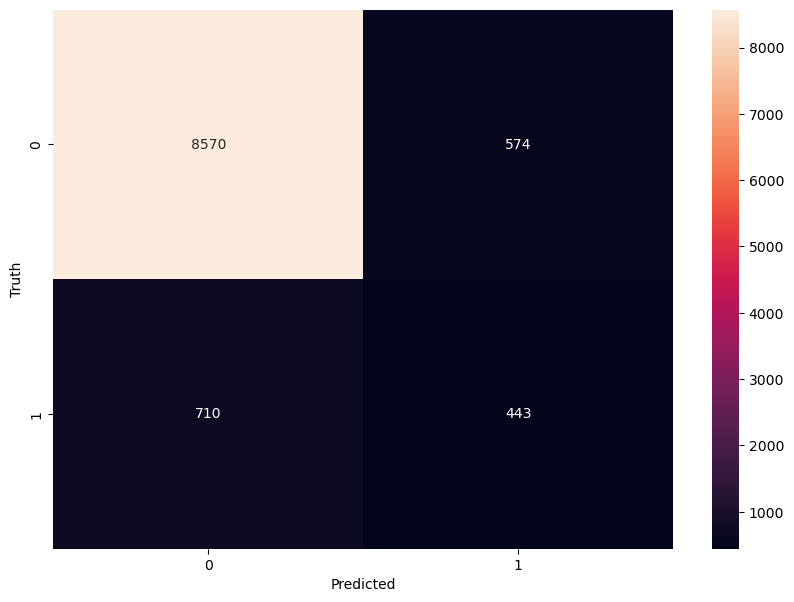

In [75]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import confusion_matrix
import seaborn as sns
from time import time

# Define the hyperparameters for randomized search
svc_params = {
    'C': uniform(loc=0.001, scale=100),  # use a continuous uniform distribution
    'gamma': uniform(loc=0.001, scale=1),  # use a continuous uniform distribution
    'class_weight': [None, 'balanced'] + [{1: w} for w in range(1, 6)]  # add more class weights
}

# Perform randomized search for each model with f1-score as the scoring metric
svc_rs_2 = RandomizedSearchCV(svc, svc_params, scoring='f1', n_jobs=-1, n_iter=50, cv=5)  # increase iterations and use 5-fold CV

# Fit the models to the training data and record the training time
start_time = time()
svc_rs_2.fit(X_train.values, y_train.values)
svc_train_time_2 = time() - start_time

# Get predictions on the test data
y_pred_test = svc_rs_2.predict(X_test.values)

# Create a dictionary with the optimized model performance metrics
data_optimized = {
    'Model': ['Support Vector Machine'],
    'Train Time': [svc_train_time_2],
    'Train F1-Score': [svc_rs_2.score(X_train.values, y_train.values)],
    'Test F1-Score': [svc_rs_2.score(X_test.values, y_test.values)]
}

# Convert the dictionary to a DataFrame
model_comparisons_optimized = pd.DataFrame(data_optimized)

# Print the DataFrame
print(model_comparisons_optimized)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


This took an absurd amount of time and shows signs of overfitting

Decided to do feaure analysis of the best model, svc_rs

Feature 0: age, Score: 0.00737
Feature 1: marital, Score: 0.00020
Feature 2: default, Score: 0.00008
Feature 3: housing, Score: -0.00003
Feature 4: loan, Score: -0.00005
Feature 5: contact, Score: 0.00027
Feature 6: month, Score: 0.02649
Feature 7: day_of_week, Score: 0.00696
Feature 8: campaign, Score: 0.00061
Feature 9: pdays, Score: 0.00735
Feature 10: previous, Score: 0.00114
Feature 11: poutcome, Score: 0.00195
Feature 12: emp.var.rate, Score: 0.01241
Feature 13: cons.price.idx, Score: -0.00016
Feature 14: cons.conf.idx, Score: 0.01872
Feature 15: euribor3m, Score: -0.00895
Feature 16: nr.employed, Score: 0.06751
Feature 17: job_admin., Score: 0.00009
Feature 18: job_blue-collar, Score: 0.00009
Feature 19: job_entrepreneur, Score: 0.00001
Feature 20: job_housemaid, Score: 0.00016
Feature 21: job_management, Score: 0.00023
Feature 22: job_retired, Score: 0.00005
Feature 23: job_self-employed, Score: -0.00008
Feature 24: job_services, Score: 0.00019
Feature 25: job_student, Score: -

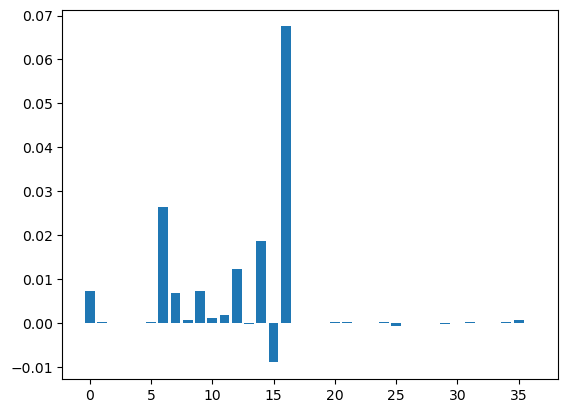

In [84]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# perform permutation importance
results = permutation_importance(svc_rs, X_train, y_train, scoring='accuracy', n_jobs=-1)

# get importance
importance = results.importances_mean

# summarize feature importance
for i, j in enumerate(importance):
    print('Feature %d: %s, Score: %.5f' % (i,X_train.columns[i],j))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


### Through permutation importance, we see how the model arrives at its results.  Given that the overall sucess rate of the marketing campaign is 8%, these results are not bad, though I would like to see an even stronger Precision Score than 57% even at the expense of more false positives